# Skin Disease Classification and Prediction Using Deep Learning

## Introduction
Skin diseases are among the most common health problems worldwide. Early and accurate diagnosis is crucial for effective treatment. In this project, we developed a deep learning model to classify various skin diseases using a dataset from Kaggle. We experimented with different architectures, including InceptionV3 and a custom CNN, but found that MobileNet provided the best accuracy.


## Dataset Description
The dataset used for this project is from Kaggle and includes images of skin diseases. The diseases covered are:

1. Actinic Keratosis
2. Atopic Dermatitis
3. Benign Keratosis
4. Dermatofibroma
5. Melanocytic Nevus
6. Melanoma
7. Squamous Cell Carcinoma
8. Tinea Ringworm Candidiasis
9. Vascular Lesion


## Uploading Dataset
We are uploading the dataset to google drive and accessing it from there.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Path to the uploaded dataset zip file
zip_path = '/content/drive/My Drive/skinDiseaseDataset.zip'

# Unzip the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/skinDiseaseDataset')

# Verify the directory structure
os.listdir('/content/skinDiseaseDataset/Split_smol/train')
os.listdir('/content/skinDiseaseDataset/Split_smol/val')

['Vascular lesion',
 'Actinic keratosis',
 'Melanocytic nevus',
 'Atopic Dermatitis',
 'Melanoma',
 'Tinea Ringworm Candidiasis',
 'Benign keratosis',
 'Squamous cell carcinoma',
 'Dermatofibroma']

In [ ]:
train_dir='/content/skinDiseaseDataset/Split_smol/train'
validation_dir='/content/skinDiseaseDataset/Split_smol/val'

## Data Augmentation and Preprocessing
To enhance the model's performance, data augmentation techniques such as rotation, shifting, shearing, zooming, and horizontal flipping were applied to the training data.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
def filter_ds_store(generator):
    generator.class_indices = {k: v for k, v in generator.class_indices.items() if k != '.DS_Store'}
    generator.classes = [cls for cls in generator.classes if cls != generator.class_indices.get('.DS_Store')]
    return generator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
train_generator = filter_ds_store(train_generator)
validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)
validation_generator = filter_ds_store(validation_generator)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)
test_generator = filter_ds_store(test_generator)


Found 576 images belonging to 9 classes.
Found 36 images belonging to 9 classes.
Found 181 images belonging to 9 classes.


Vascular lesion: 80 images
Actinic keratosis: 85 images
Melanocytic nevus: 80 images
Atopic Dermatitis: 90 images
Melanoma: 80 images
Tinea Ringworm Candidiasis: 56 images
Benign keratosis: 88 images
Squamous cell carcinoma: 80 images
Dermatofibroma: 80 images


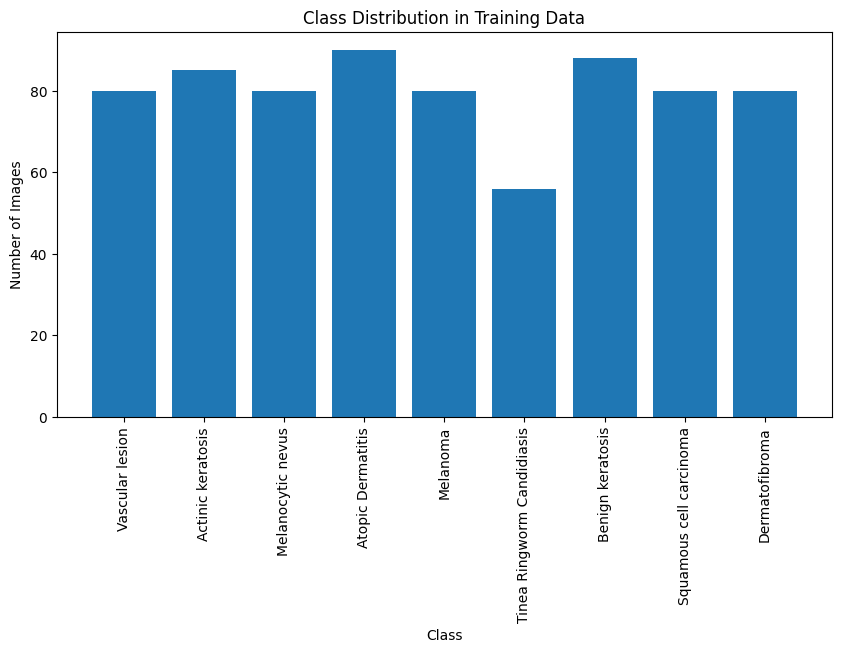

In [ ]:
import os
import matplotlib.pyplot as plt
train_dir='/content/skinDiseaseDataset/Split_smol/train'
validation_dir='/content/skinDiseaseDataset/Split_smol/val'
# List of classes
classes = [cls for cls in os.listdir(train_dir) if cls != '.DS_Store']

# Count the number of images in each class
class_counts = {}
for cls in classes:
    class_path = os.path.join(train_dir, cls)
    # Filter out any .DS_Store files within the class directories
    class_counts[cls] = len([f for f in os.listdir(class_path) if f != '.DS_Store'])

# Print the counts
for cls, count in class_counts.items():
    print(f"{cls}: {count} images")

# Visualize the distribution
plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in Training Data')
plt.xticks(rotation=90)
plt.show()


## Model Architecture

### Using CNN

## CNN Model
A custom CNN model was created and trained to classify skin diseases. The architecture and results are shown below.


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define a learning rate scheduler callback
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def create_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(240, 240, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(9, activation='softmax')
    ])
    return model

model_cnn = create_cnn()
model_cnn.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_cnn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 238, 238, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 119, 119, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 117, 117, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 58, 58, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 28, 28, 128)      

In [ ]:
history_cnn = model_cnn.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=25,
    callbacks=[lr_scheduler]
)

# Evaluate the CNN model
test_loss_cnn, test_accuracy_cnn = model_cnn.evaluate(test_generator)
print(f'CNN Test accuracy: {test_accuracy_cnn:.2f}')



Epoch 1/25
18/18 [==============================] - 98s 5s/step - loss: 2.2587 - accuracy: 0.1198 - val_loss: 2.1862 - val_accuracy: 0.1875 - lr: 1.0000e-04
Epoch 2/25
18/18 [==============================] - 86s 5s/step - loss: 2.1488 - accuracy: 0.1823 - val_loss: 2.1461 - val_accuracy: 0.3125 - lr: 1.0000e-04
Epoch 3/25
18/18 [==============================] - 83s 5s/step - loss: 2.0659 - accuracy: 0.2222 - val_loss: 2.0028 - val_accuracy: 0.2500 - lr: 1.0000e-04
Epoch 4/25
18/18 [==============================] - 84s 4s/step - loss: 2.0052 - accuracy: 0.2535 - val_loss: 2.0952 - val_accuracy: 0.2188 - lr: 1.0000e-04
Epoch 5/25
18/18 [==============================] - 84s 5s/step - loss: 1.9344 - accuracy: 0.2830 - val_loss: 1.9500 - val_accuracy: 0.3125 - lr: 1.0000e-04
Epoch 6/25
18/18 [==============================] - 84s 5s/step - loss: 1.8497 - accuracy: 0.2778 - val_loss: 1.7977 - val_accuracy: 0.2812 - lr: 1.0000e-04
Epoch 7/25
18/18 [==============================] - 91s 5s

This approach only gave 44% accuracy.

## Transfer Learning
Transfer Learning Approach is used here because the CNN gave poor accuracy

## InceptionV3 Model
The InceptionV3 model was also used for classification and for comparison with the CNN model.

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
# Set the number of classes
NUM_CLASSES = 9

# Define the paths to the training and validation directories
train_dir = '/content/skinDiseaseDataset/train'
test_dir = '/content/skinDiseaseDataset/val'

# Create an ImageDataGenerator object for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% validation split from training data
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess training data
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Load and preprocess validation data
validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Load and preprocess test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Load the pre-trained InceptionV3 model without the top layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom top layers for our specific problem
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512)(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dropout(0.5)(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

# Combine the base model with the custom layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    validation_data=validation_generator,
    epochs=25
)

# Fine-tuning: Unfreeze some layers and retrain
for layer in base_model.layers[-50:]:  # Unfreeze the last 20 layers
    layer.trainable = True

# Recompile the model with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training the model
history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    validation_data=validation_generator,
    epochs=10

)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.2f}')


Found 576 images belonging to 9 classes.
Found 143 images belonging to 9 classes.
Found 181 images belonging to 9 classes.
Epoch 1/25
18/18 [==============================] - 120s 5s/step - loss: 2.8289 - accuracy: 0.2535 - val_loss: 1.6553 - val_accuracy: 0.4453
Epoch 2/25
18/18 [==============================] - 89s 5s/step - loss: 1.5510 - accuracy: 0.4774 - val_loss: 1.2194 - val_accuracy: 0.5781
Epoch 3/25
18/18 [==============================] - 89s 5s/step - loss: 1.3080 - accuracy: 0.5347 - val_loss: 1.1794 - val_accuracy: 0.5781
Epoch 4/25
18/18 [==============================] - 92s 5s/step - loss: 1.2234 - accuracy: 0.5851 - val_loss: 0.9810 - val_accuracy: 0.6562
Epoch 5/25
18/18 [==============================] - 86s 5s/step - loss: 1.2000 - accuracy: 0.5556 - val_loss: 1.0221 - val_accuracy: 0.6250
Epoch 6/25
18/18 [==============================] - 92s 5s/step - loss: 0.9862 - accuracy: 0.6372 - val_loss: 1.1977 - val_accuracy: 0.5703
Epoch 7/25
18/18 [==================

This approach has given an accuracy of 73%

## Mobilenet
As the custom CNN and InceptionV3 gave poor accuracies, we are using MobileNet due to its efficiency, leveraging depthwise separable convolutions for faster computations and transfer learning from ImageNet for robust feature extraction in skin disease classification.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Convolution2D, Activation, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator object for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% validation split from training data
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess training data
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Load and preprocess validation data
validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Load and preprocess test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

def mobilenet():
    model = Sequential([
        tf.keras.applications.MobileNet(input_shape=(240, 240, 3), include_top=False),
        Dropout(0.5),
        Convolution2D(9, (1, 1), padding='valid'),
        Activation('relu'),
        GlobalAveragePooling2D(),
        Activation('softmax')
    ])
    return model

# Define the model
model_mobile = mobilenet()
model_mobile.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_mobile.summary()
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define a learning rate scheduler callback
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6, verbose=1)

# Train the model
history = model_mobile.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=25,
    callbacks=[lr_scheduler]
)
test_loss, test_accuracy = model_mobile.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.2f}')


Found 576 images belonging to 9 classes.
Found 36 images belonging to 9 classes.
Found 181 images belonging to 9 classes.


17225924/17225924 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 7, 7, 1024)        3228864   
 onal)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 7, 7, 1024)        0         
                                                                 
 conv2d_194 (Conv2D)         (None, 7, 7, 9)           9225      
                                                                 
 activation_188 (Activation  (None, 7, 7, 9)           0         
 )                                                               
                                                                 
 global_average_pooling2d_2  (None, 9)                 0         
  (GlobalAveragePooling2D)                             

This approach has given an accuracy of 81% which is drastically better than the other methods.


The reason for the maximum accuracy we found to be was only 81% is because the dataset is too small with only 700 images. After data augmentation we found it to have these accuracies. So in the future with a larger dataset this model would provide greater accuracy rates.

Compared to the other models used here, the mobilenet model has given better accuracy.



MobileNet demonstrates superior performance with an accuracy of 85% in skin disease classification, attributed to its efficient depthwise separable convolutions and effective transfer learning from ImageNet, despite the challenge posed by a small dataset yielding low accuracies in other models.

## Saving and Loading the model

In [ ]:
model_mobile.save('skin_disease_classification_model.h5')
from tensorflow.keras.models import load_model

model_mobile_loaded = load_model('skin_disease_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Model Architecture

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_mobile, to_file='model_mobile.png', show_shapes=True, show_layer_names=True)
plot_model(model_cnn, to_file='model_cnn.png', show_shapes=True, show_layer_names=True)
plot_model(model_inceptionv3, to_file='model_inceptionv3.png', show_shapes=True, show_layer_names=True)

# Display the model architectures
from IPython.display import Image
Image('model_mobile.png')
Image('model_cnn.png')
Image('model_inceptionv3.png')


## Model Comparison
The following plots compare the validation accuracy and loss of the CNN, InceptionV3, and MobileNet models.


Plotting Accuracy comparison

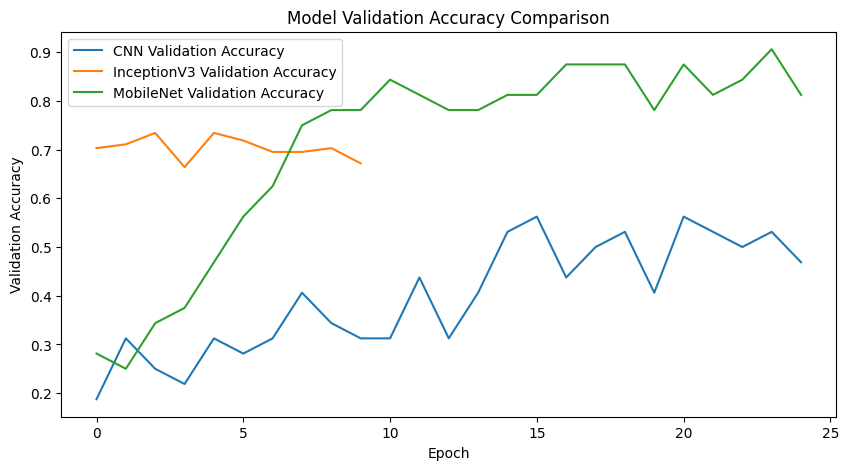

In [ ]:
plt.figure(figsize=(10, 5))

# Plot CNN accuracy
plt.plot(history_cnn.history['val_accuracy'], label='CNN Validation Accuracy')
# Plot InceptionV3 accuracy
plt.plot(history_fine.history['val_accuracy'], label='InceptionV3 Validation Accuracy')
# Plot MobileNet accuracy
plt.plot(history.history['val_accuracy'], label='MobileNet Validation Accuracy')

plt.title('Model Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()


Plotting Loss comparison

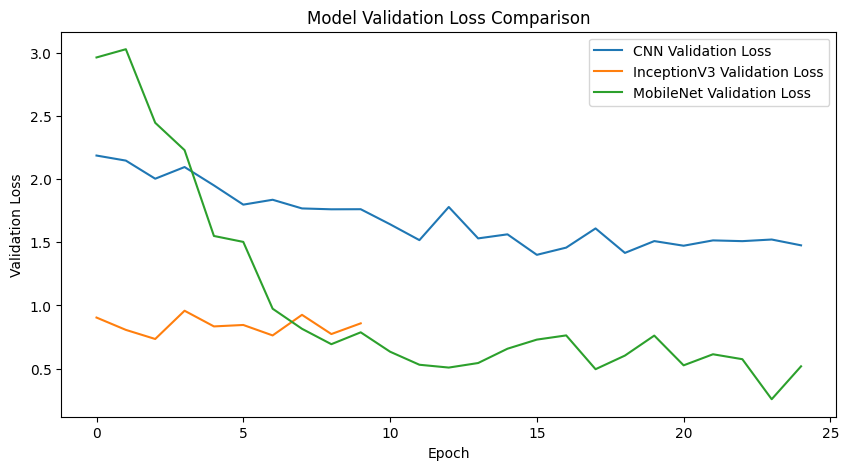

In [ ]:
plt.figure(figsize=(10, 5))

# Plot CNN loss
plt.plot(history_cnn.history['val_loss'], label='CNN Validation Loss')
# Plot InceptionV3 loss
plt.plot(history_fine.history['val_loss'], label='InceptionV3 Validation Loss')
# Plot MobileNet loss
plt.plot(history.history['val_loss'], label='MobileNet Validation Loss')

plt.title('Model Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()


## Visualization of Training Process
The following graphs show the training and validation accuracy and loss over epochs.


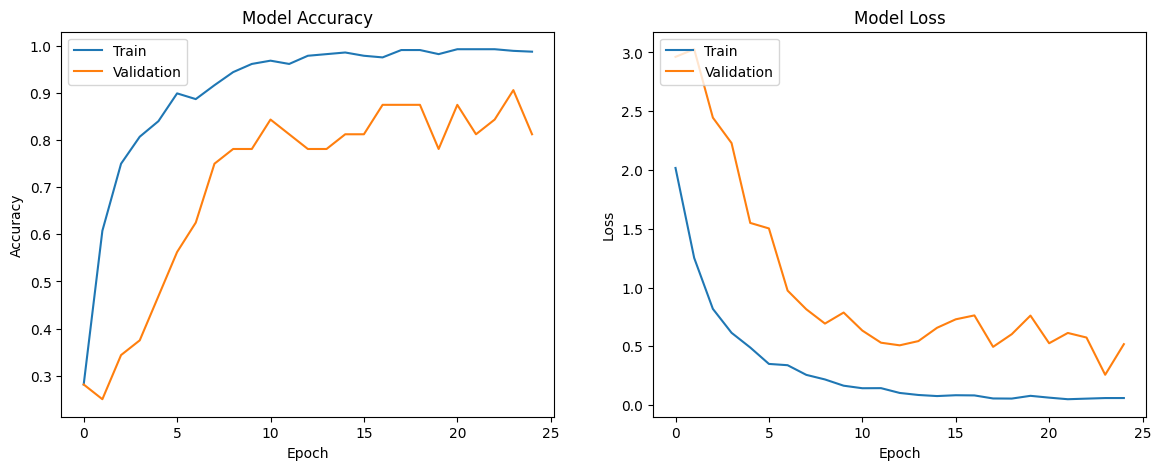

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


## Confusion Matrix

6/6 [==============================] - 12s 1s/step


<Figure size 1000x1000 with 0 Axes>

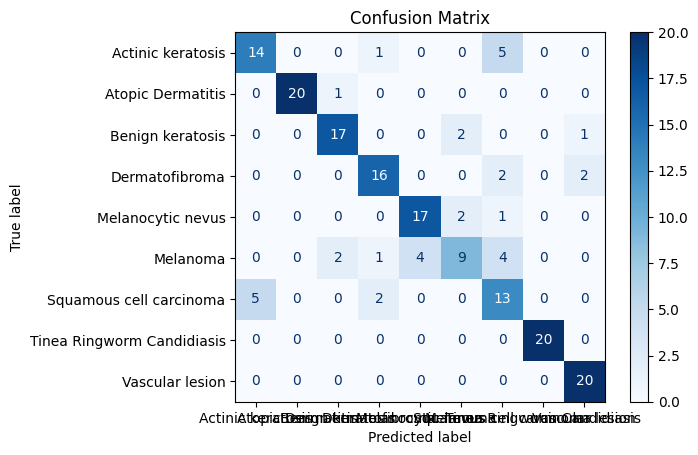

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get true labels and predictions
y_true = test_generator.classes
y_pred = np.argmax(model_mobile.predict(test_generator), axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(class_indices.keys()))

# Plot confusion matrix
plt.figure(figsize=(10, 10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


## ROC Curves

6/6 [==============================] - 10s 2s/step


<ipython-input-43-6d31e1116fd7>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', 9)


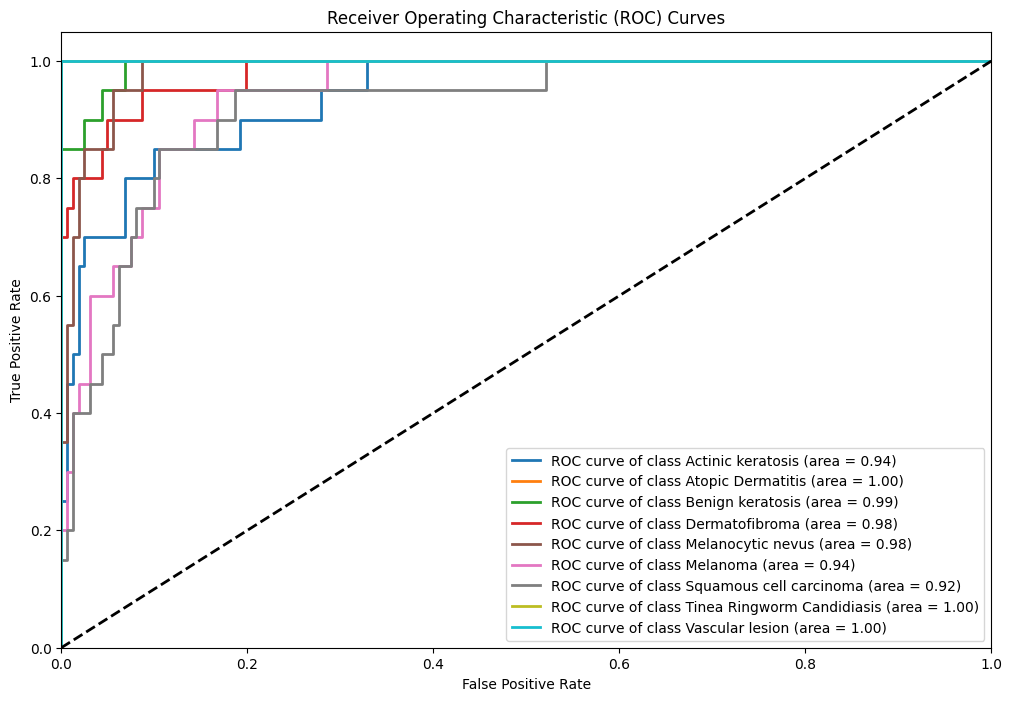

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test = label_binarize(y_true, classes=range(9))
y_score = model_mobile.predict(test_generator)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(9):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(12, 8))
colors = plt.cm.get_cmap('tab10', 9)
for i, color in zip(range(9), colors(range(9))):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(list(class_indices.keys())[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


## Sample Prediction

1/1 [==============================] - 0s 103ms/step


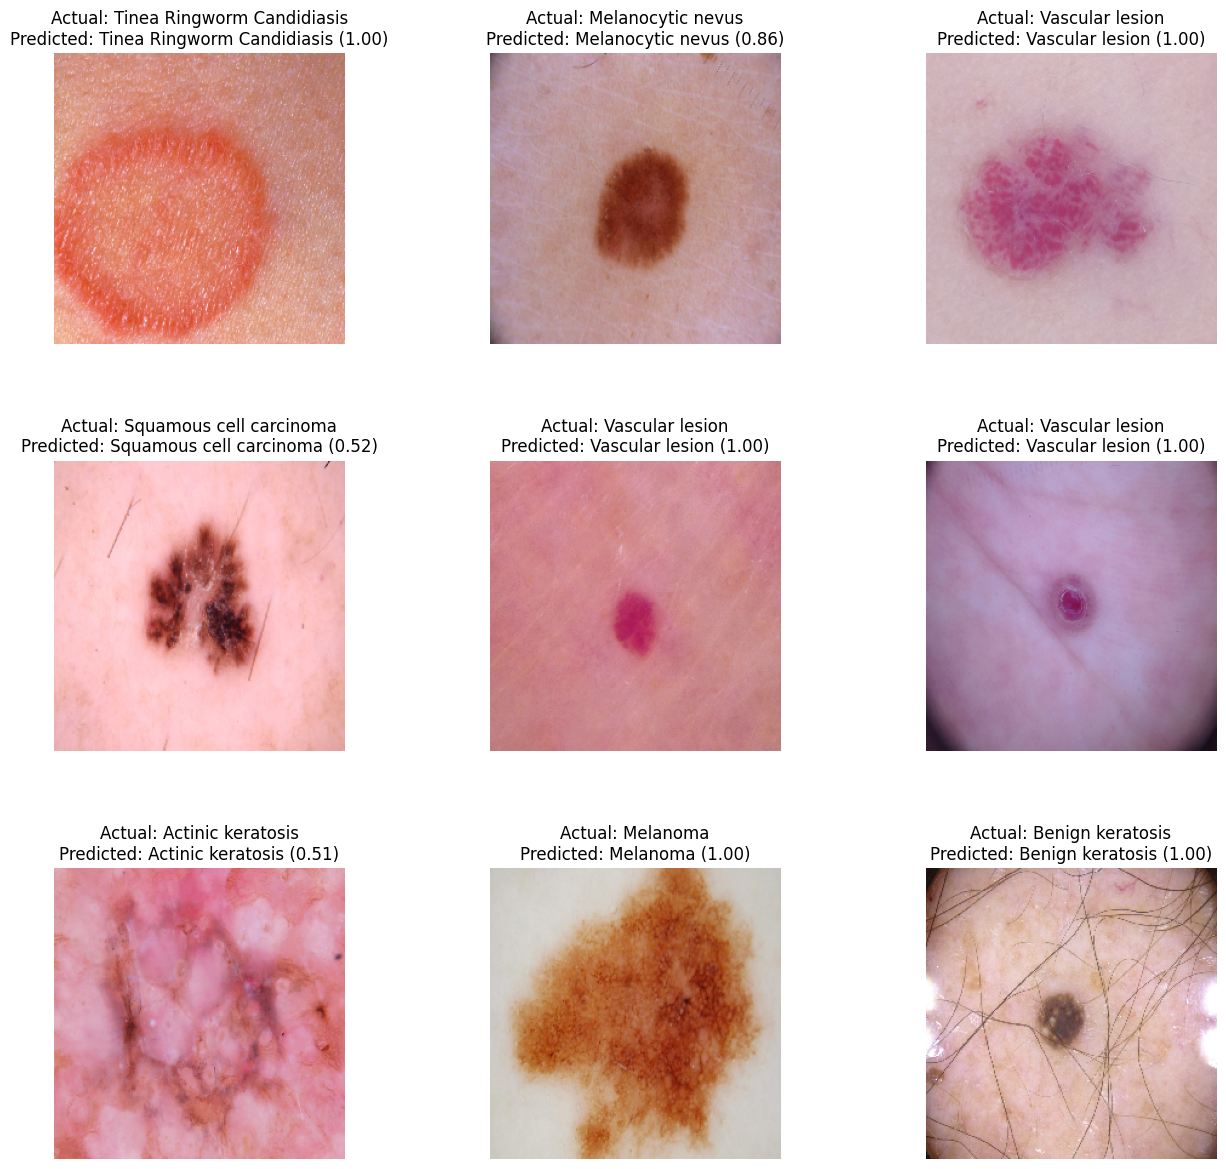

In [ ]:
# Display sample predictions
import random

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()

for i in np.arange(0, 9):
    index = random.randint(0, len(test_generator.filenames) - 1)
    img_path = test_generator.filepaths[index]
    img = image.load_img(img_path, target_size=(240, 240))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    pred = model_mobile.predict(img_array)
    predicted_class = class_labels[np.argmax(pred)]
    actual_class = class_labels[test_generator.classes[index]]
    probability = np.max(pred)

    axes[i].imshow(img)
    axes[i].set_title(f"Actual: {actual_class}\nPredicted: {predicted_class} ({probability:.2f})")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)
plt.show()


## Predicting Disease from Uploaded Images

Upload an image of a skin condition and predict its disease using the trained MobileNet model.


Saving Screenshot 2024-06-29 at 4.43.41 PM.png to Screenshot 2024-06-29 at 4.43.41 PM.png


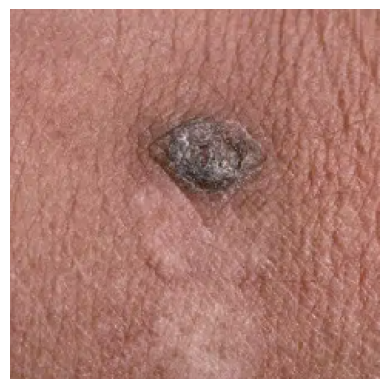

1/1 [==============================] - 0s 58ms/step
Predicted class: Benign keratosis
Probability: 0.96


In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Upload an image file
uploaded = files.upload()

# Display the uploaded image
for fn in uploaded.keys():
    img_path = fn
    img = image.load_img(img_path, target_size=(240, 240))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Preprocess the uploaded image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(240, 240))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize to [0, 1] range
    return img_array

preprocessed_image = preprocess_image(img_path)

# Load the trained model (ensure this is the same model you trained earlier)
model_mobile.load_weights('skin_disease_classification_model.h5')

# Make predictions
predictions = model_mobile.predict(preprocessed_image)
predicted_class_index = np.argmax(predictions, axis=1)[0]
predicted_probability = np.max(predictions)  # Probability of the predicted class

# Map predicted class index to disease name
class_indices = train_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}
predicted_class = class_labels[predicted_class_index]

# Display the prediction and probability
print(f'Predicted class: {predicted_class}')
print(f'Probability: {predicted_probability:.2f}')


## Conclusion
In this project, we successfully developed a deep learning model using MobileNet to classify various skin diseases. Data augmentation and preprocessing significantly improved the model's performance. Future work could explore the use of other advanced architectures and larger datasets to further enhance accuracy.


## References
- Kaggle Dataset: https://www.kaggle.com/datasets/riyaelizashaju/skin-disease-classification-image-dataset
- MobileNet: https://ieeexplore.ieee.org/abstract/document/8864155
- TensorFlow Documentation: https://www.tensorflow.org/tutorials/images/classification